In [1]:
from collections import OrderedDict

import numpy as np
import matplotlib.pyplot as plt

import bayes_opt.visualization.visualization_utility_cost as viz
from bayes_opt.test_functions import drl_experiments
from bayes_opt.utility.basic_utility_functions import evaluating_final_util_MaxEpoch
from tqdm import tqdm
from bayes_opt.sequentialBO.boil import BOIL
from bayes_opt.curve_compression import return_logistic_curve

import warnings
warnings.filterwarnings("ignore")

W1119 09:15:55.333803  3760 deprecation.py:323] From C:\Users\Vu\Anaconda3\envs\tfgpu\lib\site-packages\tensorflow\python\compat\v2_compat.py:96: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
Instructions for updating:
non-resource variables are not supported in the long term


# Initialize the tuning hyperparameters and DDQN algorithm

In [2]:
SearchSpace = OrderedDict([('gamma',(0.8,1)), ('maxEpisodes',(200, 500))])

varParams = list(SearchSpace.keys())
fixedParams = OrderedDict([
        ("DDQN", True),
        ("Duelling", True),
        ("buffer_size", 5000),
        ("batch_sz", 64),
        ("maxSteps", 200),
        ("PER", 0),
        ("alpha", 1.0),
        ("update_rate", 1),
        ("architecture", [50,50]),
        ("maxExp", 10000),
        ("eps_0", 1.0),
        ("eps_final", 0.05),
        ("beta_time", 1000),
        ("beta_0", 0.6),
        ("beta_final", 1.0)])

# Initialize the CartPole-v0 environment to be run with DQN
myfunction=drl_experiments.DRL_experiment("DQN", "CartPole-v0", varParams, fixedParams, SearchSpace)

# Initializing BOIL


In [3]:
acq_name='ei_mu_max' # selecting the acquisition function ['ei', 'ucb', 'ei_mu_max']

func_params={}
func_params['function']=myfunction

boil=BOIL(myfunction.func,myfunction.bounds,acq_name=acq_name,verbose=1)

# Initialize with 2 observations randomly

In [4]:
print("initializing with 2 points - please wait...")
boil.init(n_init_points=2)

print("done initialization")

initializing with 2 points - please wait...
Max #augmented points 10 	 #augmented points  9 	 Augmented points:  [0.    0.095 0.217 0.346 0.5   0.635 0.755 0.894 1.   ]
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
done initialization


# Run one iteration and plot the GP surrogate and acquisition function

ln of conditioning number of GP covariance matrix 9.2
selected point from acq func: [0.9983 0.1353] acq val=log(Utility/Cost)= -0.6482
Max #augmented points 1 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.9997] t=241 current y=2.40, ybest=120.84


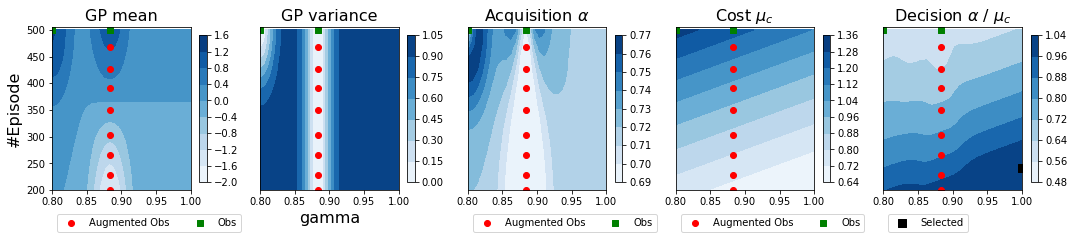

In [5]:
# Suggest the next experiment
boil.suggest_nextpoint()

# plot the acquisition function
viz.plot_bo_2d_cost_utility_AF(boil)


# We run further 10 iterations

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

ln of conditioning number of GP covariance matrix 9.2
==estimated lengthscale_x=0.3000   lengthscale_t=0.600   Logistic_m0=-0.3   Logistic_g0=1.4
selected point from acq func: [0.     0.2839] acq val=log(Utility/Cost)= -1.2742
Max #augmented points 2 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8] t=285 current y=46.71, ybest=120.84


 10%|████████                                                                        | 1/10 [08:43<1:18:27, 523.02s/it]

ln of conditioning number of GP covariance matrix 9.6
selected point from acq func: [0.1814 1.    ] acq val=log(Utility/Cost)= -2.6058
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8363] t=500 current y=122.86, ybest=122.86


 20%|████████████████                                                                | 2/10 [24:45<1:27:18, 654.76s/it]

ln of conditioning number of GP covariance matrix 9.7
selected point from acq func: [1. 1.] acq val=log(Utility/Cost)= -4.0242
Max #augmented points 10 	 #augmented points  5 	 Augmented points:  [0.    0.33  0.568 0.814 1.   ]
[original scale] x=[1.] t=500 current y=10.40, ybest=122.86


 30%|████████████████████████▌                                                         | 3/10 [26:54<58:00, 497.16s/it]

ln of conditioning number of GP covariance matrix 9.7
==estimated lengthscale_x=0.3000   lengthscale_t=0.600   Logistic_m0=-0.4   Logistic_g0=1.2
selected point from acq func: [0.     0.6894] acq val=log(Utility/Cost)= -2.449
Max #augmented points 6 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8] t=407 current y=101.43, ybest=122.86


 40%|████████████████████████████████▊                                                 | 4/10 [40:39<59:32, 595.44s/it]

ln of conditioning number of GP covariance matrix 9.8
selected point from acq func: [0.1594 1.    ] acq val=log(Utility/Cost)= -4.3592
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8319] t=500 current y=118.02, ybest=122.86


 50%|█████████████████████████████████████████                                         | 5/10 [56:39<58:43, 704.76s/it]

ln of conditioning number of GP covariance matrix 9.8
selected point from acq func: [0. 1.] acq val=log(Utility/Cost)= -4.4617
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8] t=500 current y=125.02, ybest=125.02


 60%|████████████████████████████████████████████████                                | 6/10 [1:14:27<54:15, 813.82s/it]

ln of conditioning number of GP covariance matrix 9.9
selected point from acq func: [0. 1.] acq val=log(Utility/Cost)= -4.6024
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.8] t=500 current y=130.21, ybest=130.21


 70%|████████████████████████████████████████████████████████                        | 7/10 [1:33:19<45:27, 909.17s/it]

ln of conditioning number of GP covariance matrix 9.9
==estimated lengthscale_x=0.0647   lengthscale_t=0.567   Logistic_m0=-0.2   Logistic_g0=1.4
selected point from acq func: [0.6827 0.0266] acq val=log(Utility/Cost)= -1.3795
[original scale] x=[0.9365] t=208 current y=8.58, ybest=130.21


 80%|████████████████████████████████████████████████████████████████                | 8/10 [1:37:26<23:41, 710.52s/it]

ln of conditioning number of GP covariance matrix 9.6
selected point from acq func: [0.3 1. ] acq val=log(Utility/Cost)= -2.6533
Max #augmented points 10 	 #augmented points  0 	 Augmented points:  []
[original scale] x=[0.86] t=500 current y=111.89, ybest=130.21


 90%|████████████████████████████████████████████████████████████████████████        | 9/10 [1:53:40<13:09, 789.70s/it]

ln of conditioning number of GP covariance matrix 9.6
selected point from acq func: [0.5984 1.    ] acq val=log(Utility/Cost)= -1.2769
Max #augmented points 10 	 #augmented points  6 	 Augmented points:  [0.    0.197 0.471 0.76  0.83  1.   ]
[original scale] x=[0.9197] t=500 current y=121.35, ybest=130.21


100%|███████████████████████████████████████████████████████████████████████████████| 10/10 [2:09:55<00:00, 845.13s/it]


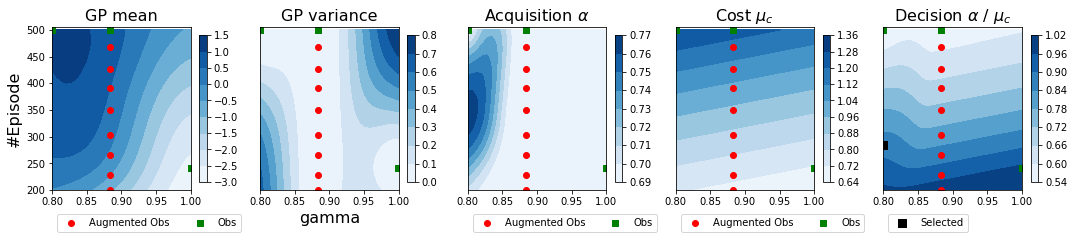

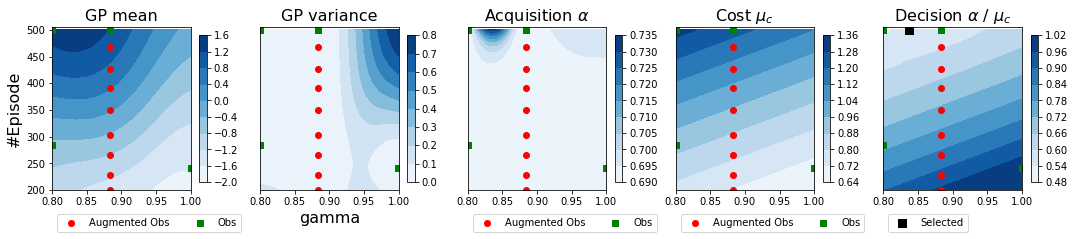

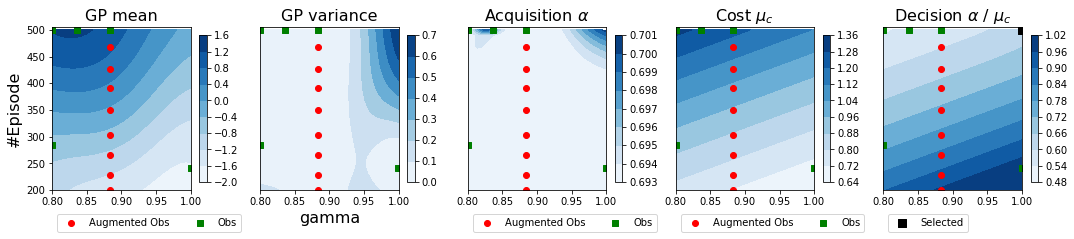

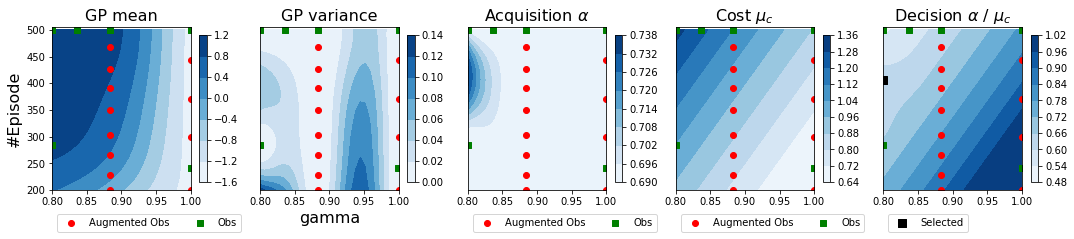

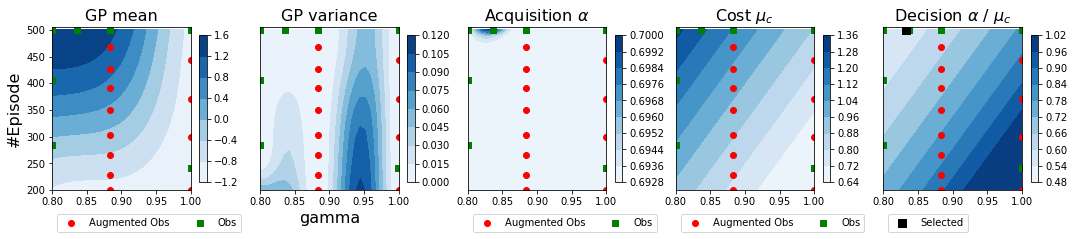

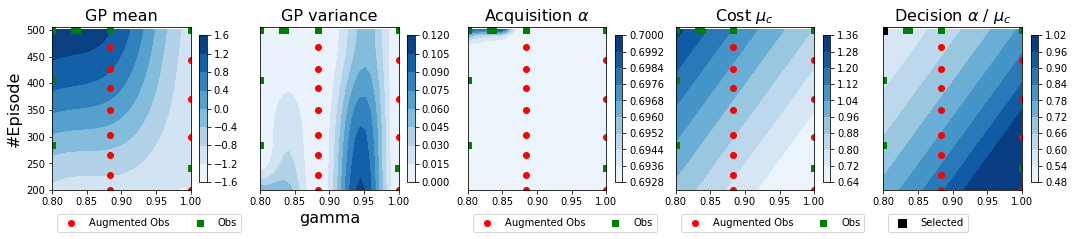

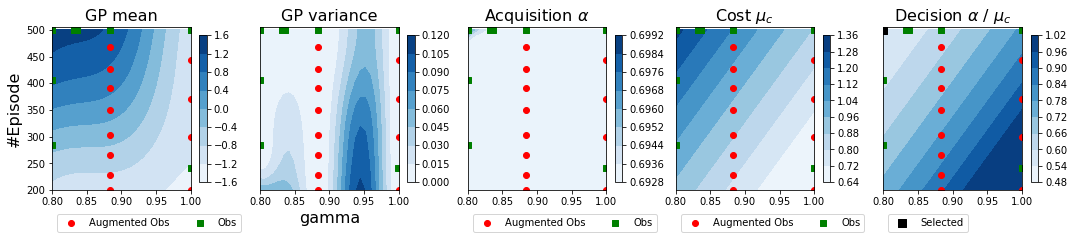

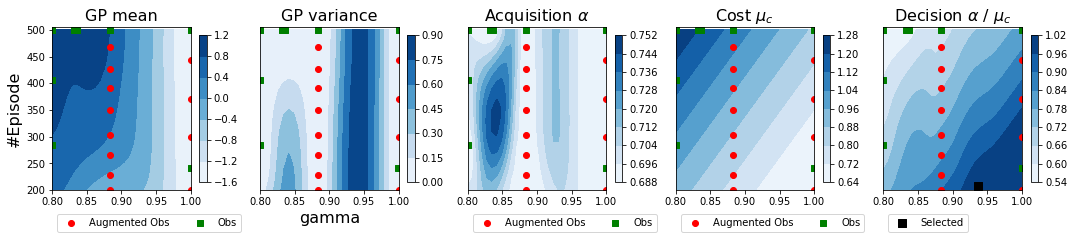

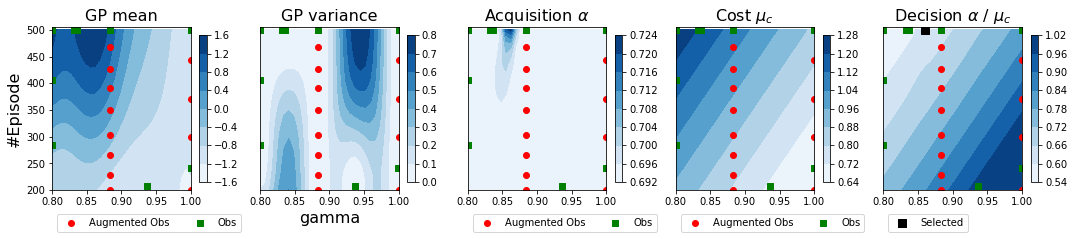

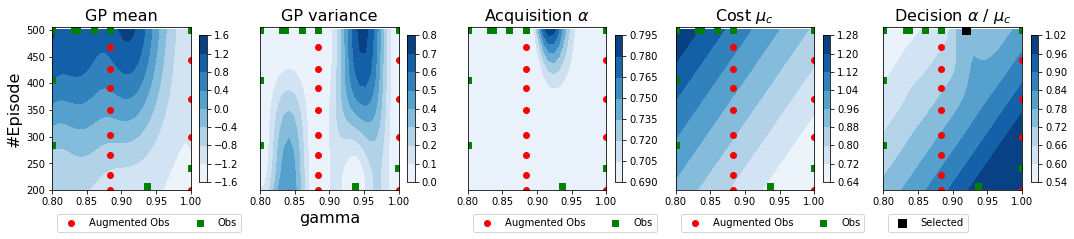

In [6]:
for ii in tqdm(range(10)):
    # Suggest the next experiment
    boil.suggest_nextpoint()

    # plot the acquisition function
    viz.plot_bo_2d_cost_utility_AF(boil)

# We evaluate the final performance score util MaxEpoch. The final utility score is marginalizing with different choices for the Logisic curve.

100%|██████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<?, ?it/s]


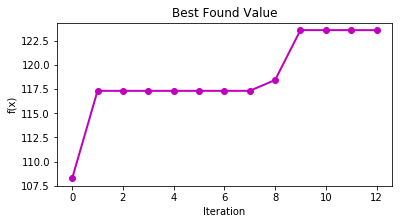

In [7]:
boil.Y_original=evaluating_final_util_MaxEpoch(boil)
viz.show_optimization_progress(boil)

# Select the optimal hyperparameter, run to Max Iteration, plot the found curve

Best found hyperparameter = [0.8834044]


Text(0.5, 1.0, 'Training curve of best found hyperparameter')

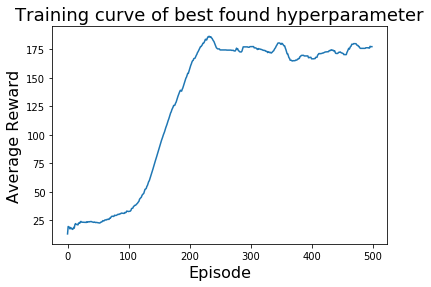

In [8]:
# select the optimal hyperparameter
idxMax=np.argmax(boil.Y_original)
print("Best found hyperparameter =",boil.X_original[idxMax])

# play the best parameter to Max Iteration
curve,time=myfunction.func(boil.X_original[idxMax])
curve=curve[0]
average100_curve=[np.mean( curve[max(0,n-100):n+1] )     for n in range(len(curve)) ]

# plot the found curve
fig=plt.figure()
plt.plot(average100_curve)
plt.xlabel('Episode',fontsize=16)
plt.ylabel('Average Reward',fontsize=16)
plt.title("Training curve of best found hyperparameter",fontsize=18)


# Plot  Natural log of Conditioning number of the GP covariance matrix

Text(0, 0.5, 'Ln of Cond Number of Cov Matrix')

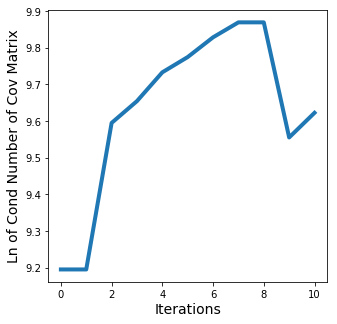

In [9]:
fig=plt.figure(figsize=(5,5))
plt.plot(np.log(boil.condition_number),linewidth=4)
plt.xlabel('Iterations',fontsize=14)
plt.ylabel('Ln of Cond Number of Cov Matrix',fontsize=14)


# Plot the estimated preference function

Text(0.5, 1.0, 'Estimated Logistic Curve $m_0$=-0.2 $g_0$=1.4')

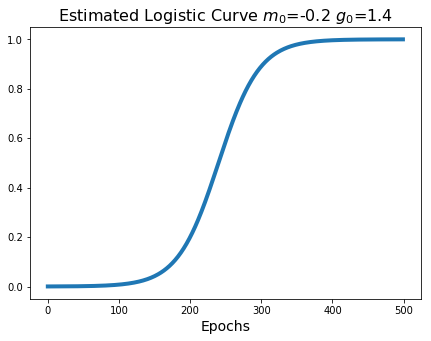

In [10]:
estimated_curve=return_logistic_curve(midpoint=boil.gp.logistic_hyper['midpoint'], 
                                      growth=boil.gp.logistic_hyper['growth'],
                                      MaxEpoch=SearchSpace['maxEpisodes'][1])

fig=plt.figure(figsize=(7,5))
plt.plot(estimated_curve,linewidth=4)
plt.xlabel('Epochs',fontsize=14)
plt.xlabel('Epochs',fontsize=14)

strTitle="Estimated Logistic Curve $m_0$={:.1f} $g_0$={:.1f}".format(boil.gp.logistic_hyper['midpoint'],boil.gp.logistic_hyper['growth'])
plt.title(strTitle,fontsize=16)